In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
df=files.upload()

Saving Housing_Data_data_minning _project_1.csv to Housing_Data_data_minning _project_1.csv


In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.impute import *
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import *

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

housing_data= pd.read_csv("Housing_Data_data_minning _project_1.csv")


#PREPROCESSING PART
#predictors except last columns
#sale_price prediction
# numerical 0-5, 7,8,13,17
#categorical values garage type, has fireplace, has pool, central heat, central cool, street name, city
#nan drop unit number
#drop street name
# check na values drop rows with na 
#label encoding- garage type, has fireplace, has pool, central heat, central cool
#one hot encoding- city
#drop zip code (make correlation befotre deciding to drop or not)
#drop unit number too many na's
#drop house number
#drop carpet sqft
#decide later on garage sqft
#feature scaling on non encoded columns

#dropping irrelavant columns-- zipcode, unit number, street name, house number, carport sqft,garage sqft check again
housing_data= housing_data.drop(housing_data.columns[[7,8,13,14,15,17]], axis=1)


#checking null values
housing_data.isnull().sum()

#--- No null values in any of the columns

#Label encoding
labelencoder=preprocessing.LabelEncoder()


#label encoding on columns 7-10
housing_data.iloc[:,7:11]= housing_data.iloc[:,7:11].apply(labelencoder.fit_transform)

#onehotencoder

#one Hot Encoding on two columns garage_type and city
onehotencoder=preprocessing.OneHotEncoder()


#One Hot encoding on garage type df
garage_type= pd.get_dummies(housing_data["garage_type"])

#One Hot encoding on the City column
city= pd.get_dummies(housing_data["city"])


#drop the categorical column from the original df 
housing_data= housing_data.drop(housing_data.columns[[6]], axis=1)

#drop the presicted columns from predictors df
housing_data=housing_data.drop(housing_data.columns[[10]], axis=1)

#join the dummy variables to the original df
housing_data= housing_data.join(garage_type)


# now join

housing_data=housing_data.join(city)

#predict_variable

y=housing_data["sale_price"]

#remove y_pred from original df 
housing_data= housing_data.drop(housing_data.columns[[10]], axis=1)

#df without feature scaling

housing_data_one=housing_data.copy()




#feature scaling on nummeric and non encoded columns

scaler= MinMaxScaler()

housing_data.iloc[:,0:6]=scaler.fit_transform(housing_data.iloc[:,0:6])


In [5]:
housing_data

,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,...,South Anthony,South Stevenfurt,Toddshire,Wendybury,West Ann,West Brittanyview,West Gerald,West Gregoryview,West Lydia,West Terrence
0,0.25,0.129032,0.125,1.0,0.136353,0.120047,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.25,0.096774,0.125,1.0,0.160126,0.129306,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.25,0.096774,0.250,0.0,0.127649,0.101852,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.25,0.129032,0.250,0.0,0.147635,0.147112,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.25,0.129032,0.250,0.0,0.127569,0.112924,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,0.25,0.032258,0.125,0.0,0.047868,0.040275,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
42699,0.25,0.032258,0.125,0.0,0.047949,0.040080,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
42700,0.25,0.032258,0.125,0.0,0.048110,0.039692,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
42701,0.25,0.096774,0.250,0.0,0.112902,0.090391,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
del housing_data["Toddshire"]

In [28]:
housing_data

,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,...,Scottberg,South Anthony,South Stevenfurt,Wendybury,West Ann,West Brittanyview,West Gerald,West Gregoryview,West Lydia,West Terrence
0,0.25,0.129032,0.125,1.0,0.136353,0.120047,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.25,0.096774,0.125,1.0,0.160126,0.129306,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.25,0.096774,0.250,0.0,0.127649,0.101852,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.25,0.129032,0.250,0.0,0.147635,0.147112,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.25,0.129032,0.250,0.0,0.127569,0.112924,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42698,0.25,0.032258,0.125,0.0,0.047868,0.040275,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
42699,0.25,0.032258,0.125,0.0,0.047949,0.040080,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
42700,0.25,0.032258,0.125,0.0,0.048110,0.039692,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
42701,0.25,0.096774,0.250,0.0,0.112902,0.090391,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:

################################### DATA PARTITIONING ##################################

#80% of dataset in training
x_train, x_rem , y_train, y_rem = train_test_split(housing_data, y, train_size=0.8)

# Testing data 10% and validation set 10%

x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.5)

In [62]:
#Building Models and appending all the metrics in an array
mse_arr=[]
sse_arr=[]
rmse_arr=[]
mae_arr=[]
Accuracy_arr=[]

# Gradient Boosting Regressor
def gradient_regression():
  Gradient_Regressor = GradientBoostingRegressor(
      n_estimators=2000,
      learning_rate=0.2,
      max_depth=6,
      min_samples_leaf=10,
      max_features=0.1,
      loss='huber',
      random_state=0
  )

  Gradient_Regressor.fit(x_train,y_train)
  y_gradient=Gradient_Regressor.predict(x_test)
  y_gradient_train=Gradient_Regressor.predict(x_train)
  Gradient_Accuracy=Gradient_Regressor.score(x_test,y_test)
  Accuracy_arr.append(Gradient_Accuracy)
  # Calculate the mean squared error
 
  mse = mean_squared_error(y_test, y_gradient)
  mse_arr.append(mse)
# Calculate the root mean squared error
  rmse = np.sqrt(mse)
  rmse_arr.append(rmse)
  sse = np.sum((y_test - y_gradient) ** 2)
  sse_arr.append(sse)
  mae = np.mean(np.abs(y_test - y_gradient))
  mae_arr.append(mae)
  plt.scatter(y_test, y_gradient)
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")
  plt.title("Actual vs predicted values (Gradient Regression)")
  plt.show()

def random_regressor():
  rand_regressor= RandomForestRegressor(n_estimators=300, max_features='sqrt', random_state=42)


  rand_regressor.fit(x_train,y_train)
  y_random=rand_regressor.predict(x_test)
  y_train_rand=rand_regressor.predict(x_train)
  rand_accuracy=rand_regressor.score(x_test,y_test) 
  Accuracy_arr.append(rand_accuracy)
  # Calculate the mean squared error

  mse = mean_squared_error(y_test, y_random)
  mse_arr.append(mse)
# Calculate the root mean squared error
  rmse = np.sqrt(mse)
  rmse_arr.append(rmse)
  sse = np.sum((y_test - y_random) ** 2)
  sse_arr.append(sse)
  mae = np.mean(np.abs(y_test - y_random))
  mae_arr.append(mae)
  plt.scatter(y_test, y_random)
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")
  plt.title("Actual vs predicted values (Random Forest Regression)")
  plt.show()


def decision_tree():
  regressor = DecisionTreeRegressor()
  regressor.fit(x_train, y_train)

  y_decision = regressor.predict(x_test)
  dt_accuracy=regressor.score(x_test,y_test)
  Accuracy_arr.append(dt_accuracy)
  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_decision)
  mse_arr.append(mse)
# Calculate the root mean squared error
  rmse = np.sqrt(mse)
  rmse_arr.append(rmse)
  sse = np.sum((y_test - y_decision) ** 2)
  sse_arr.append(sse)
  mae = np.mean(np.abs(y_test - y_decision))
  mae_arr.append(mae)
  plt.scatter(y_test, y_decision)
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")
  plt.title("Actual vs predicted values (Decision Tree Regression)")
  plt.show()

  
def linear_regressor():
  linear= LinearRegression() # initialise the model

  linear.fit(x_train,y_train) # fit on x train and y train

  y_linear=linear.predict(x_test)  # predict x test

  linear_accuracy=linear.score(x_test,y_test) #accuracy
  Accuracy_arr.append(linear_accuracy)
  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_linear)
  mse_arr.append(mse)
# Calculate the root mean squared error
  rmse = np.sqrt(mse)
  rmse_arr.append(rmse)
  sse = np.sum((y_test - y_linear) ** 2)
  sse_arr.append(sse)
  mae = np.mean(np.abs(y_test - y_linear))
  mae_arr.append(mae)
  plt.scatter(y_test, y_linear)
  plt.xlabel("Actual values")
  plt.ylabel("Predicted values")
  plt.title("Actual vs predicted values (Linear Regression)")
  plt.show()

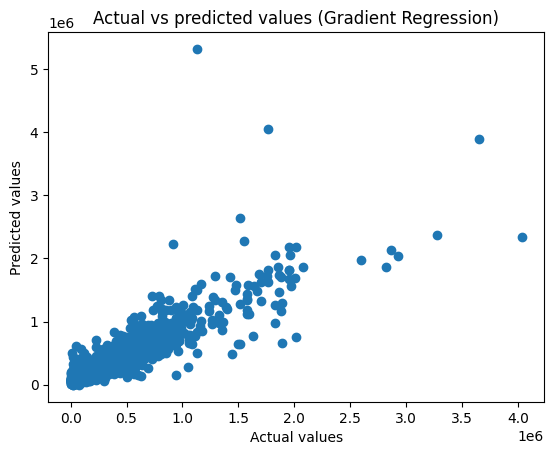

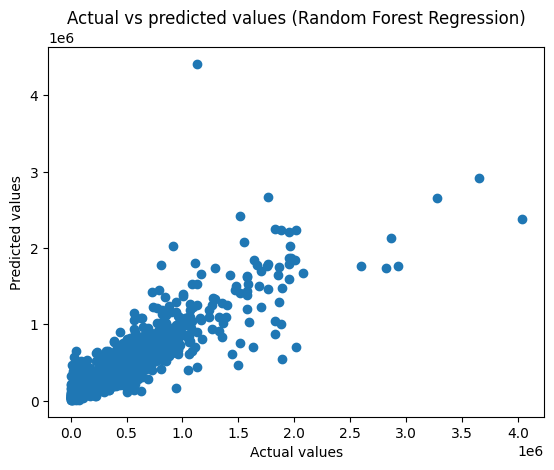

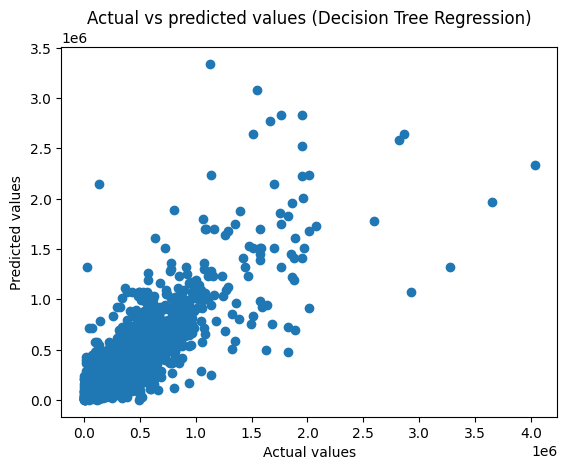

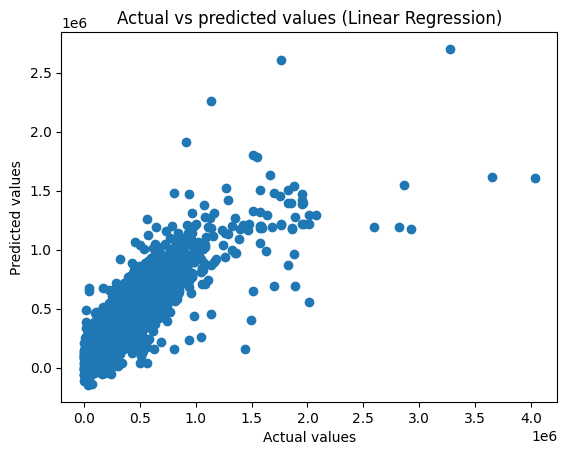

,models,R2_Score,rmse_arr,mse_arr,sse_arr,mae_arr
0,gradient_regression,0.750858,132479.313093,1.755077e+10,7.495933e+13,60376.192758
1,random_regressor,0.776320,125527.208518,1.575708e+10,6.729849e+13,60042.299438
2,decision_tree,0.647967,157476.769388,2.479893e+10,1.059162e+14,78915.779298
3,linear_regressor,0.670627,152324.159347,2.320265e+10,9.909852e+13,93282.511796


In [63]:
#Function Call and Creating a DataFrame
models=[gradient_regression, random_regressor, decision_tree, linear_regressor]
for i in models:
  i()
data = {
    "models":['gradient_regression', 'random_regressor', 'decision_tree','linear_regressor'],
    "R2_Score":Accuracy_arr,
  "rmse_arr":rmse_arr,
  "mse_arr":mse_arr,
  "sse_arr":sse_arr,
  "mae_arr":mae_arr

}
df1=pd.DataFrame(data)
df1

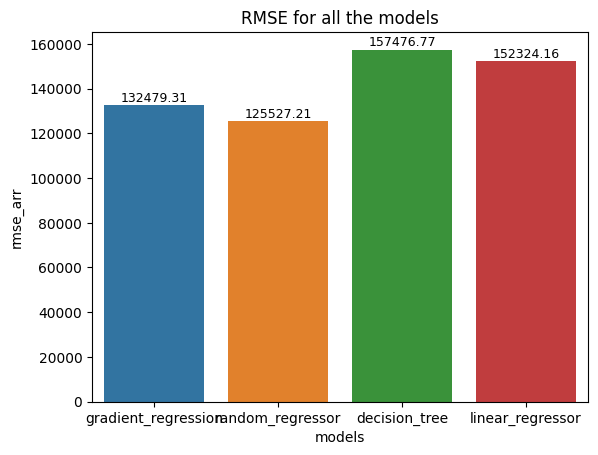

In [144]:

import seaborn as sns
import matplotlib.pyplot as plt
plots = sns.barplot(x="models", y="rmse_arr", data=df1)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')

plt.title("RMSE for all the models")

plt.show()

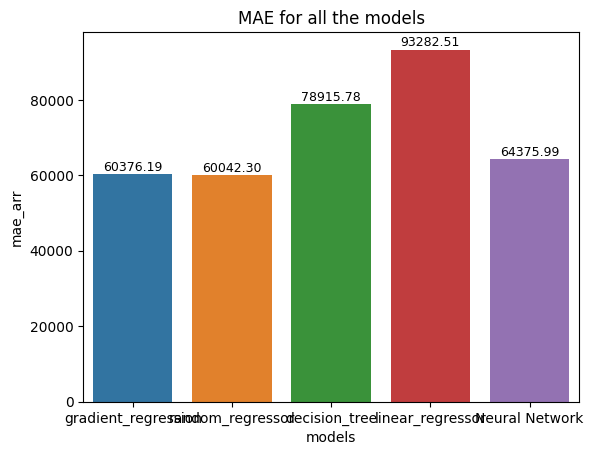

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
plots = sns.barplot(x="models", y="mae_arr", data=df1)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 5),
                   textcoords='offset points')
plt.title("MAE for all the models")
plt.show()

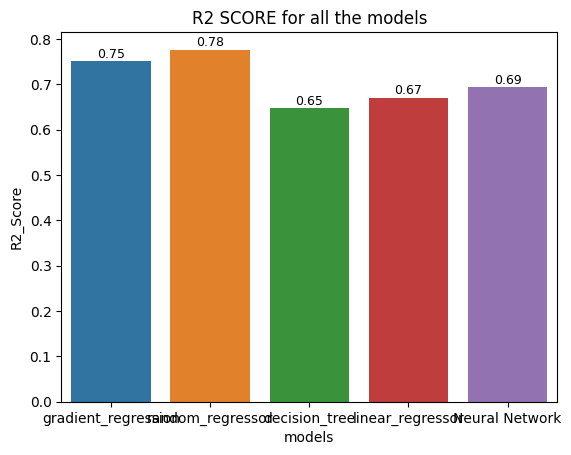

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
plots = sns.barplot(x="models", y="R2_Score", data=df1)
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0,5),
                   textcoords='offset points')
plt.title("R2 SCORE for all the models")    
plt.show()

In [ ]:
#NEURAL NETWORKS


from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


model= Sequential()

#Input Layer
model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))


#Hidden Layer
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#Output Layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()


#checkpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

#training
model.fit(x_train, y_train, epochs=400, batch_size=200, validation_split = 0.2, callbacks=callbacks_list)


In [65]:

# Load wights file of the best model :
wights_file = 'Weights-374--65318.66016.hdf5' # choose the best checkpoint
model.load_weights(wights_file) # load it
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])

134/134 [==============================] - 0s 2ms/step - loss: 64376.0000 - mean_absolute_error: 64376.0000
Test loss: 64376.0
Test accuracy: 6437600.0


In [ ]:
predictions = model.predict(x_test)
predictions


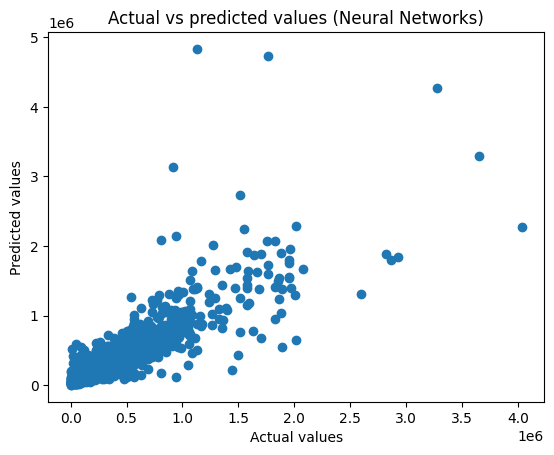

In [133]:
#Visualizing Neural Network Model
plt.scatter(y_test, predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs predicted values (Neural Networks)")
plt.show()

In [67]:
new_b=r2_score(predictions,y_test)
new_b


0.6933725724408524

In [68]:
mse_neural= mean_squared_error(predictions, y_test)
mse_neural

21321771725.731777

In [110]:
rmse_neural= mse_neural ** 1/2
rmse_neural=round(rmse_neural, 5)

In [70]:
mae_neural= mean_absolute_error(predictions, y_test)
mae_neural

64375.99138034743

In [77]:
sse = np.sum((np.array(y_test) - predictions) ** 2)
sse

2.553476801257996e+18

In [145]:
#list=["Neural Network",0.6111850657374804,13010979268.116573,26021958536.233147,1.858482e+14,65726.37078022455]
#arr=["Neural Network",new_b,rmse_neural,mse_neural,sse,mae_neural]
df2 = pd.DataFrame({"models":"Neural Network",
                    "R2_Score":new_b, 
                    "rmse_arr":rmse_neural,
                    "mse_arr":mse_neural,
                    "sse_arr":sse,
                    "mae_arr":mae_neural}, index=[0])

df1=df1.append(df2, ignore_index = True)
#df1 = df1.drop([df1.index[4], df1.index[5]])

<ipython-input-145-01bdb44a9c2f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df2, ignore_index = True)


In [146]:
df1

,models,R2_Score,rmse_arr,mse_arr,sse_arr,mae_arr
0,gradient_regression,0.750858,132479.313093,1.755077e+10,7.495933e+13,60376.192758
1,random_regressor,0.776320,125527.208518,1.575708e+10,6.729849e+13,60042.299438
2,decision_tree,0.647967,157476.769388,2.479893e+10,1.059162e+14,78915.779298
3,linear_regressor,0.670627,152324.159347,2.320265e+10,9.909852e+13,93282.511796
4,Neural Network,0.693373,10660885862.865891,2.132177e+10,2.553477e+18,64375.991380
